# D4RL returns
* Compare return distributions for different tasks in each environment

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torch.nn.utils.rnn import pad_sequence

from src.utils.data import parse_stacked_trajectories

seed = 0

In [2]:
def get_returns(dataset):
    traj_dataset = parse_stacked_trajectories(
        obs=dataset["observations"],
        act=dataset["actions"],
        rwd=dataset["rewards"],
        next_obs=dataset["next_observations"],
        terminated=dataset["terminals"],
        timeout=dataset["timeouts"],
        max_eps=1000
    )
    return [np.sum(traj["rwd"]) for traj in traj_dataset]

In [3]:
# load hopper data
with open("../data/d4rl/hopper-expert-v2.p", "rb") as f:
    hopper_expert = pickle.load(f)

with open("../data/d4rl/hopper-medium-expert-v2.p", "rb") as f:
    hopper_medium_expert = pickle.load(f)

hopper_expert_returns = get_returns(hopper_expert)
hopper_medium_expert_returns = get_returns(hopper_medium_expert)

In [6]:
# load halfcheetah data
with open("../data/d4rl/halfcheetah-expert-v2.p", "rb") as f:
    halfcheetah_expert = pickle.load(f)

with open("../data/d4rl/halfcheetah-medium-expert-v2.p", "rb") as f:
    halfcheetah_medium_expert = pickle.load(f)

halfcheetah_expert_returns = get_returns(halfcheetah_expert)
halfcheetah_medium_expert_returns = get_returns(halfcheetah_medium_expert)

In [7]:
# load walker data
with open("../data/d4rl/walker2d-expert-v2.p", "rb") as f:
    walker2d_expert = pickle.load(f)

with open("../data/d4rl/walker2d-medium-expert-v2.p", "rb") as f:
    walker2d_medium_expert = pickle.load(f)

walker2d_expert_returns = get_returns(walker2d_expert)
walker2d_medium_expert_returns = get_returns(walker2d_medium_expert)

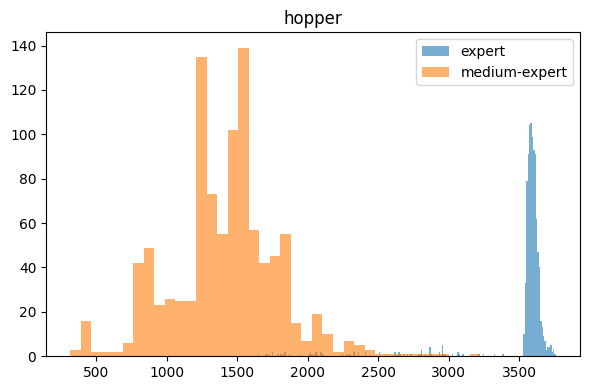

In [5]:
# plot hopper return distributions
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(hopper_expert_returns, bins="fd", alpha=0.6, label="expert")
ax.hist(hopper_medium_expert_returns, bins="fd", alpha=0.6, label="medium-expert")
ax.legend()
ax.set_title("hopper")
plt.tight_layout()
plt.show()

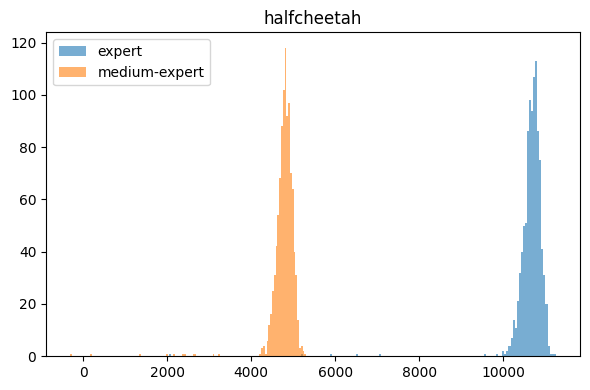

In [8]:
# plot halfcheetah return distributions
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(halfcheetah_expert_returns, bins="fd", alpha=0.6, label="expert")
ax.hist(halfcheetah_medium_expert_returns, bins="fd", alpha=0.6, label="medium-expert")
ax.legend()
ax.set_title("halfcheetah")
plt.tight_layout()
plt.show()

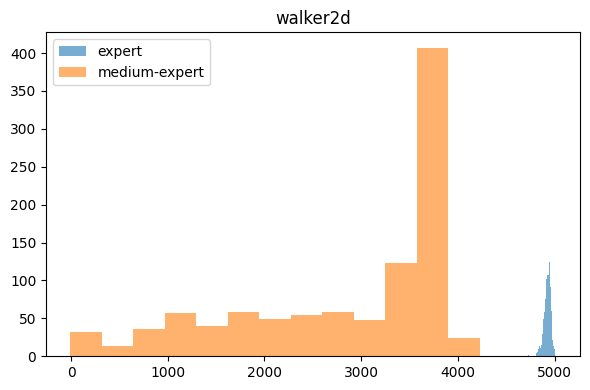

In [9]:
# plot walker return distributions
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(walker2d_expert_returns, bins="fd", alpha=0.6, label="expert")
ax.hist(walker2d_medium_expert_returns, bins="fd", alpha=0.6, label="medium-expert")
ax.legend()
ax.set_title("walker2d")
plt.tight_layout()
plt.show()